In [1]:
import pyqsp
from pyqsp.LPoly import *
from pyqsp.gadgets import *
import jax
import jax.numpy as jnp
import numpy as np
from tqdm.notebook import tqdm
from scipy.interpolate import approximate_taylor_polynomial
from matplotlib import pyplot as plt
import copy

np.set_printoptions(linewidth=100000)

In [27]:
Xi_1 = [np.array([0, np.pi/3, -np.pi/3, 0])]
S_1 = [[0, 1, 0]]
G = AtomicGadget(Xi_1, S_1, label="G")

Xi_2 = np.array([[np.pi/5, np.pi/6, -np.pi/6, -np.pi/5]])
S_2 = [[1, 0, 1]]
G_tilde = AtomicGadget(Xi_2, S_2, label="G_tilde")

In [28]:
# Performs an interlink of the G gadget with the extraction gadget. Note that deg is the 
# degree of the polynomial used in the correction. If it were instead "None" no correction
# would be applied
deg = 20

G_interlink = G.interlink(G_tilde, [
    (('G', 0), ('G_tilde', 0), deg)
])

In [29]:
# Sets gadget leg inputs
F = lambda x, y : {("G", 0): x, ("G", 1): y, ("G_tilde", 1): 0.5}

In [30]:
# Gets the sequence of a leg of the gadget interlink
fn = lambda x, y : G_interlink.get_qsp_unitary(('G_tilde', 0))(F(x, y))[0][0]

In [31]:
# Plots the gadget interlink
data = [[fn(x, y) for x in np.linspace(-1, 1, 20)] for y in tqdm(np.linspace(-1, 1, 20))]

  0%|          | 0/20 [00:00<?, ?it/s]

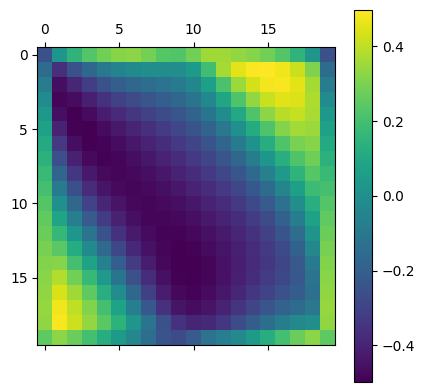

In [32]:
plt.matshow(np.real(data))
plt.colorbar()

In [33]:
f = lambda x, y : G.get_qsp_unitary(('G', 0))({('G', 0) : x, ('G', 1) : y})[0][0]
g = lambda x, y : G_tilde.get_qsp_unitary(('G_tilde', 0))({('G_tilde', 0) : x, ('G_tilde', 1) : y})[0][0]

In [34]:
h = lambda x, y : g(f(x, y), 0.5)

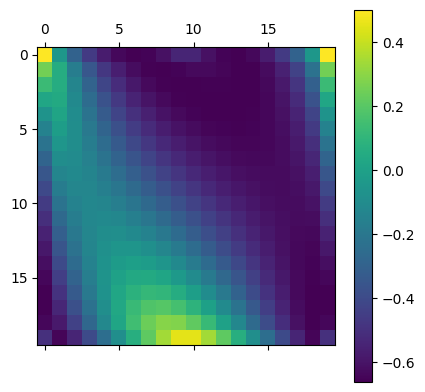

In [38]:
plt.matshow([[np.real(h(x, y)) for x in np.linspace(-1, 1, 20)] for y in np.linspace(-1, 1, 20)])
plt.colorbar()